In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

In [8]:
# 데이터 불러오기
smp = pd.read_csv('data/hourly_smp_v1.csv')

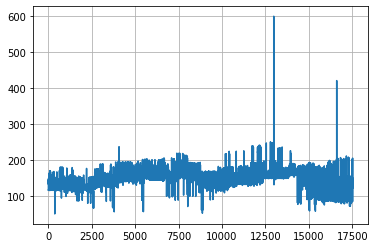

In [7]:
# 시각화
plt.plot(smp['smp'])
plt.grid()
plt.show()

In [92]:
# 훈련 및 검증 데이터 생성
data = np.array(smp['smp'])

n = 3
k = 24*30-1
X_train_stack = []
for i in range(n):
    X_train_stack.append(data[i:i-n-k])
X_train = np.c_[X_train_stack].T
X_train = X_train[:,:,np.newaxis]
y_train = data[n+k:]

m = int(len(y_train)*0.75)
(X_train, y_train), (X_test, y_test) = (X_train[:m], y_train[:m]), (X_train[m:], y_train[m:])

In [93]:
# 모델 생성 (LSTM)
model = Sequential()
model.add(LSTM(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [94]:
# 모델 훈련
cp_callback = tf.keras.callbacks.ModelCheckpoint('cpts/smp_lstm_20200504', save_weights_only=True, verbose=0)
result = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[cp_callback], validation_data=(X_test, y_test))

Train on 12598 samples, validate on 4200 samples
Epoch 1/100
12598/12598 [==============================] - 4s 306us/sample - loss: 22317.5616 - val_loss: 21421.3957
Epoch 2/100
12598/12598 [==============================] - 1s 109us/sample - loss: 21532.1341 - val_loss: 20817.1936
Epoch 3/100
12598/12598 [==============================] - 1s 109us/sample - loss: 20590.3992 - val_loss: 19784.1229
Epoch 4/100
12598/12598 [==============================] - 1s 117us/sample - loss: 19822.1151 - val_loss: 19107.1933
Epoch 5/100
12598/12598 [==============================] - 1s 111us/sample - loss: 19148.7035 - val_loss: 18471.0043
Epoch 6/100
12598/12598 [==============================] - 1s 118us/sample - loss: 18507.0594 - val_loss: 17859.3261
Epoch 7/100
12598/12598 [==============================] - 1s 115us/sample - loss: 17887.3651 - val_loss: 17266.9781
Epoch 8/100
12598/12598 [==============================] - 2s 122us/sample - loss: 17284.9445 - val_loss: 16689.9543
Epoch 9/100
125

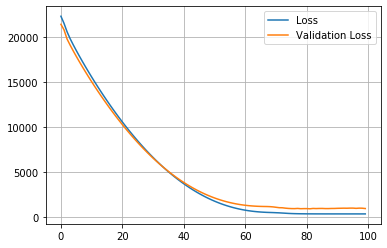

In [98]:
# 시각화 (2)
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

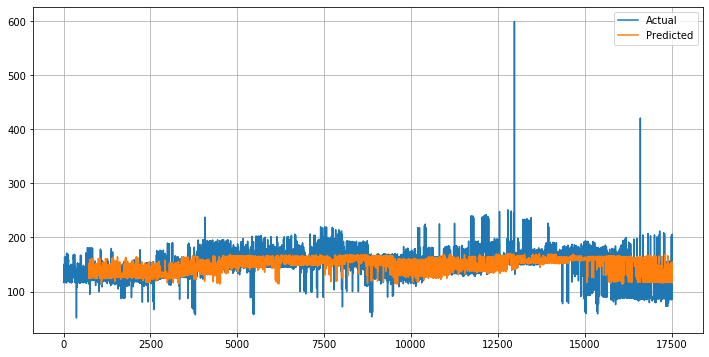

In [102]:
# 시각화 (3)
plt.figure(figsize=(12,6))
y_pred = model.predict(np.r_[X_train, X_test])
y_actual = np.r_[y_train, y_test]
plt.plot(data, label='Actual')
plt.plot(np.arange(n+k, len(data)), y_pred, label='Predicted')
plt.legend()
plt.grid()
plt.show()

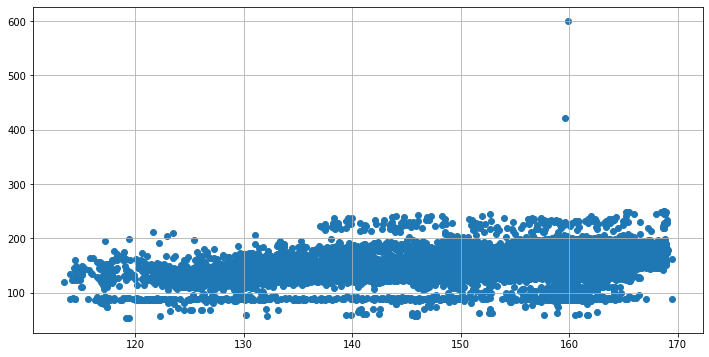

In [103]:
# 시각화 (4)
plt.figure(figsize=(12,6))
plt.scatter(y_pred, y_actual)
plt.grid()
plt.show()